<a href="https://colab.research.google.com/github/ahmasaidMDT/AUHAccidentData/blob/main/AUHAccidentNew24Apr2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Traffic_Accidents_AUH.csv to Traffic_Accidents_AUH.csv


In [2]:
import pandas as pd

# Load Arabic dataset
df = pd.read_csv('Traffic_Accidents_AUH.csv', encoding='utf-8-sig')

# Combine date + time
df['التاريخ والوقت'] = pd.to_datetime(df['تاريخ البلاغ'] + ' ' + df['وقت البلاغ'], format='%d-%m-%y %H:%M')

# Create injury flag
df['هل يوجد إصابة؟'] = df['عدد المصابين'].apply(lambda x: 'نعم' if x > 0 else 'لا')

# Extract features
df['الساعة'] = df['التاريخ والوقت'].dt.hour
df['يوم الأسبوع'] = df['التاريخ والوقت'].dt.day_name()
df['نهاية الأسبوع؟'] = df['يوم الأسبوع'].isin(['Friday', 'Saturday'])

# Preview data
df.head()


,تاريخ البلاغ,وقت البلاغ,نوع الحادث,المدينة,الشارع,نوعية الحادث,السبب,السطح,الطقس,العمر,عدد المصابين,التاريخ والوقت,هل يوجد إصابة؟,الساعة,يوم الأسبوع,نهاية الأسبوع؟
0,01-01-16,15:15,حادث سير بإصابات,ابوظبي,طريق أبوظبي - العين,تدهور,الإنحراف المفاجئ,جاف,صحو,54,4,2016-01-01 15:15:00,نعم,15,Friday,True
1,23-01-16,5:45,حادث سير بإصابات,ابوظبي,نقطة تفتيش الحدود الغربية,صدم عمودي,عدم إفساح الطريق / عدم إعطاء الألوية,جاف,صحو,47,1,2016-01-23 05:45:00,نعم,5,Saturday,True
2,31-01-16,16:40,حادث سير بإصابات,ابوظبي,طريق طريف,صدم خلفي,عدم ترك مسافة كافية,جاف,صحو,59,1,2016-01-31 16:40:00,نعم,16,Sunday,False
3,02-10-16,10:40,حادث سير بإصابات,ابوظبي,طريق أبوظبي - العين,صدم عمودي,الإنحراف المفاجئ,جاف,صحو,56,1,2016-10-02 10:40:00,نعم,10,Sunday,False
4,06-09-16,9:10,حادث سير بإصابات,ابوظبي,نقطة تفتيش الحدود الغربية,صدم جانبي,عدم إفساح الطريق / عدم إعطاء الألوية,جاف,صحو,45,1,2016-09-06 09:10:00,نعم,9,Tuesday,False


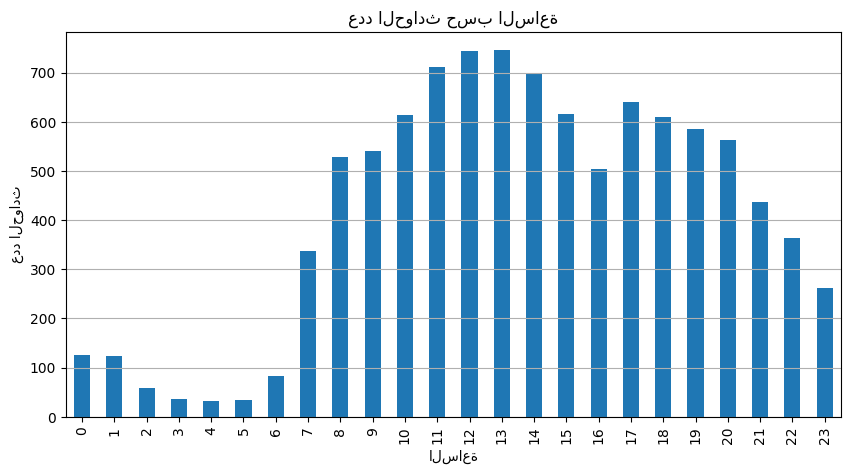

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df['الساعة'].value_counts().sort_index().plot(kind='bar')
plt.title("عدد الحوادث حسب الساعة")
plt.xlabel("الساعة")
plt.ylabel("عدد الحوادث")
plt.grid(axis='y')
plt.show()


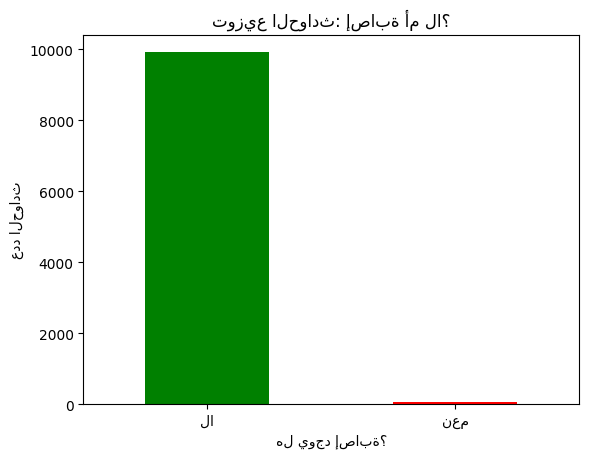

In [4]:
df['هل يوجد إصابة؟'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("توزيع الحوادث: إصابة أم لا؟")
plt.xticks(rotation=0)
plt.xlabel("هل يوجد إصابة؟")
plt.ylabel("عدد الحوادث")
plt.show()


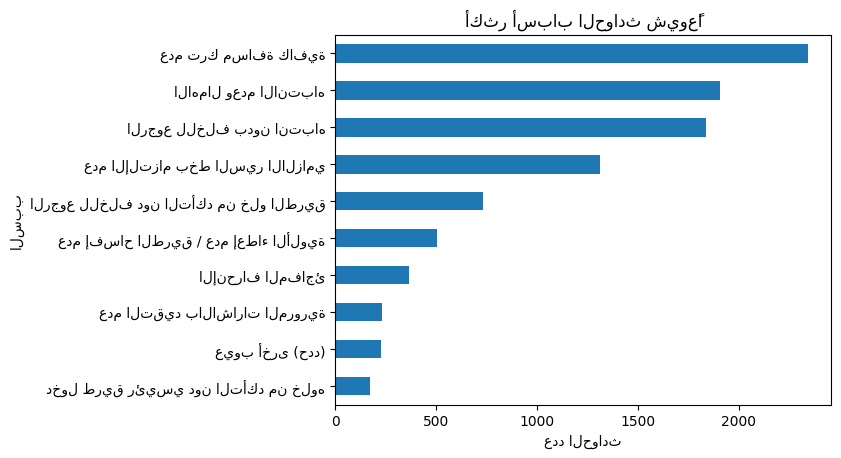

In [5]:
df['السبب'].value_counts().head(10).plot(kind='barh')
plt.title("أكثر أسباب الحوادث شيوعًا")
plt.xlabel("عدد الحوادث")
plt.gca().invert_yaxis()
plt.show()


In [6]:
!apt-get -y install fonts-noto
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Naskh Arabic'


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji
  fonts-noto-core fonts-noto-extra fonts-noto-mono fonts-noto-ui-core
  fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 34 not upgraded.
Need to get 317 MB of archives.
After this operation, 790 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:

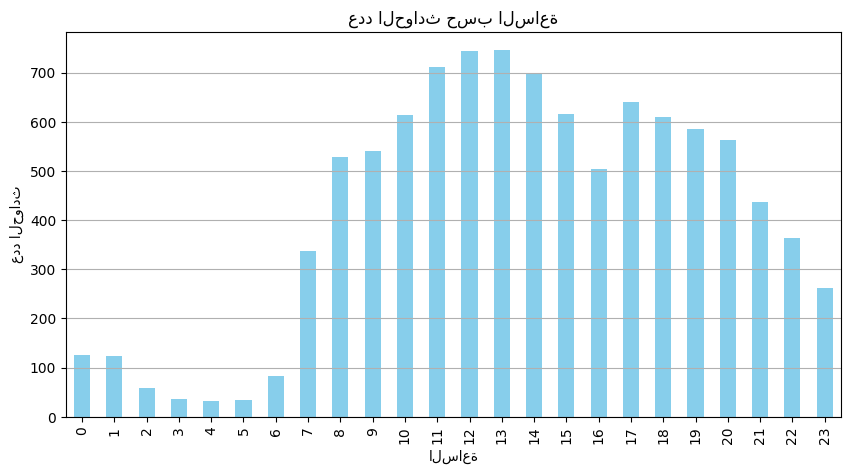

In [7]:
plt.figure(figsize=(10,5))
df['الساعة'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("عدد الحوادث حسب الساعة")
plt.xlabel("الساعة")
plt.ylabel("عدد الحوادث")
plt.grid(axis='y')
plt.show()


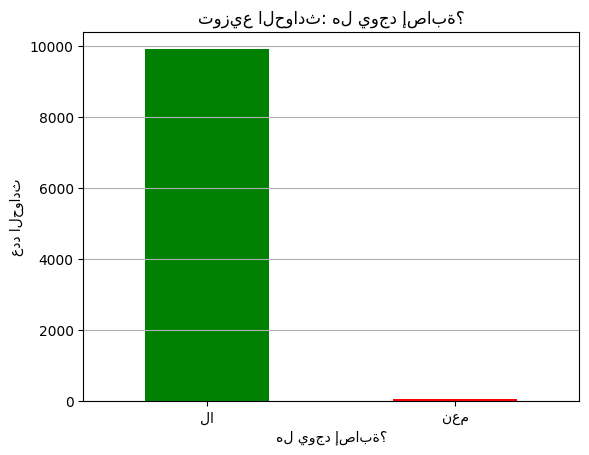

In [8]:
df['هل يوجد إصابة؟'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("توزيع الحوادث: هل يوجد إصابة؟")
plt.xlabel("هل يوجد إصابة؟")
plt.ylabel("عدد الحوادث")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


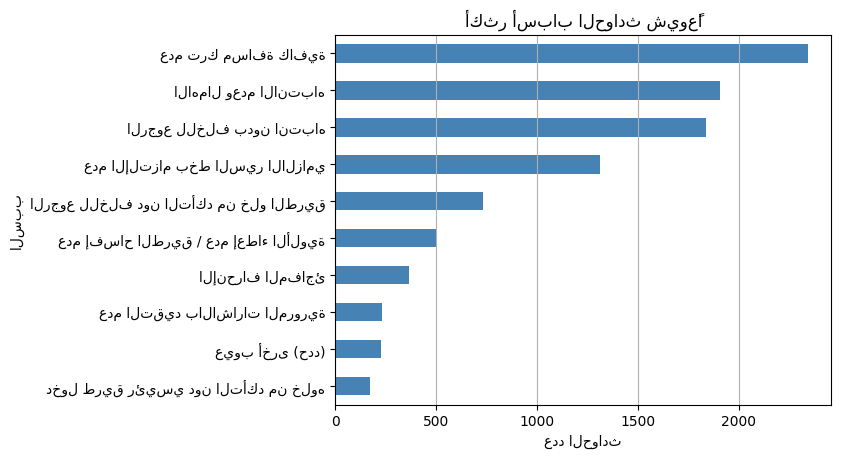

In [9]:
df['السبب'].value_counts().head(10).plot(kind='barh', color='steelblue')
plt.title("أكثر أسباب الحوادث شيوعًا")
plt.xlabel("عدد الحوادث")
plt.ylabel("السبب")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset to preserve original
df_encoded = df.copy()

# List of Arabic categorical columns to encode
cat_cols = ['الشارع', 'السبب', 'نوعية الحادث', 'الطقس', 'السطح']

# Apply label encoding
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    encoders[col] = le  # Save encoder in case we need to decode later


In [11]:
# Injury flag as binary (0 = لا, 1 = نعم)
df_encoded['هل يوجد إصابة؟'] = df_encoded['هل يوجد إصابة؟'].map({'لا': 0, 'نعم': 1})


In [14]:
df_encoded[['الشارع', 'السبب', 'نوعية الحادث', 'الطقس', 'السطح', 'الساعة', 'العمر', 'هل يوجد إصابة؟']].head()


,الشارع,السبب,نوعية الحادث,الطقس,السطح,الساعة,العمر,هل يوجد إصابة؟
0,211,3,2,0,2,15,54,1
1,221,23,13,0,2,5,47,1
2,219,31,12,0,2,16,59,1
3,211,3,13,0,2,10,56,1
4,221,23,6,0,2,9,45,1


In [15]:
from sklearn.model_selection import train_test_split

# Features we'll use
features = ['الشارع', 'السبب', 'نوعية الحادث', 'الطقس', 'السطح', 'الساعة', 'العمر']

X = df_encoded[features]
y = df_encoded['هل يوجد إصابة؟']

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Use class_weight='balanced' due to imbalance
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['لا', 'نعم']))


[[1868  111]
 [   3   18]]
              precision    recall  f1-score   support

          لا       1.00      0.94      0.97      1979
         نعم       0.14      0.86      0.24        21

    accuracy                           0.94      2000
   macro avg       0.57      0.90      0.61      2000
weighted avg       0.99      0.94      0.96      2000



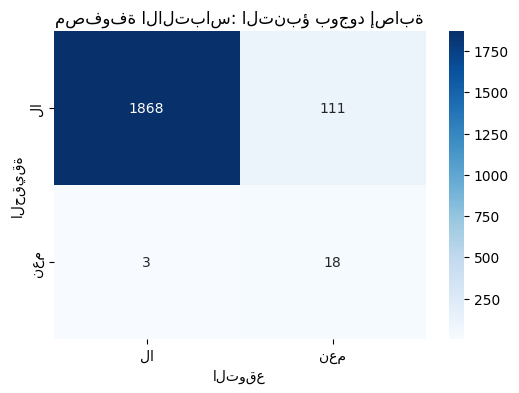

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define Arabic class labels
labels = ['لا', 'نعم']

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('التوقع')
plt.ylabel('الحقيقة')
plt.title('مصفوفة الالتباس: التنبؤ بوجود إصابة')
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=['لا', 'نعم']))


[[1979    0]
 [  20    1]]
              precision    recall  f1-score   support

          لا       0.99      1.00      0.99      1979
         نعم       1.00      0.05      0.09        21

    accuracy                           0.99      2000
   macro avg       0.99      0.52      0.54      2000
weighted avg       0.99      0.99      0.99      2000



In [19]:
!pip install imbalanced-learn


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Apply SMOTE to training set only
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Train model again with balanced data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on original test set
y_pred_smote = rf_smote.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote, target_names=['لا', 'نعم']))


[[1956   23]
 [   8   13]]
              precision    recall  f1-score   support

          لا       1.00      0.99      0.99      1979
         نعم       0.36      0.62      0.46        21

    accuracy                           0.98      2000
   macro avg       0.68      0.80      0.72      2000
weighted avg       0.99      0.98      0.99      2000



In [21]:
# Save final dataset as CSV
df_encoded.to_csv('Traffic_Accidents_AUH_Processed.csv', index=False, encoding='utf-8-sig')

# Download to your PC
from google.colab import files
files.download('Traffic_Accidents_AUH_Processed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import joblib

# Save model to a file
joblib.dump(rf_smote, 'rf_model_trained.pkl')

# Download the file to your PC
from google.colab import files
files.download('rf_model_trained.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>